Write a program to perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 × 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#first, initialize the array
N = 20
lattice = np.empty((20,20),int)

In [3]:
for i in range(N):
    for j in range(N):
        #initialize randomly as 1 or -1
        if np.random.random() <= 0.5:
            lattice[i,j] = 1
        else: 
            lattice[i,j] = -1

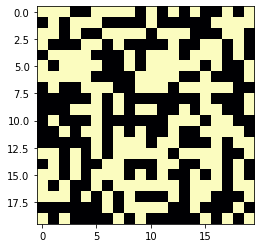

In [4]:
plt.imshow(lattice,cmap = 'magma')

# a) First write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions sisj from all of them, then multiply by −J. 


Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term −Js1s2 if spins 1 and 2 are adjacent to one another, but you do not also need a term −Js2s1. 

Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python’s ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower.

In [5]:
def energy(s):
    J = 1
    s1 = s[:-1,:]*s[1:,:]
    s2 = s[:,:-1]*s[:,1:]

    E = -J*(s1.sum() + s2.sum())

    return E

In [6]:
energy(lattice)

8

# b) Now use your function as the basis for a Metropolis-style simulation of the Ising model with J = 1 and temperature T = 1 in units where the Boltzmann constant kB is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magnetization of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spin. Now repeat this process for many moves.

In [7]:
from numpy.random import randint


Initialize lattice here

In [8]:
#first, initialize the array
N = 20
s = np.empty((20,20),int)
for i in range(N):
    for j in range(N):
        #initialize randomly as 1 or -1
        if np.random.random() <= 0.5:
            s[i,j] = 1
        else: 
            s[i,j] = -1

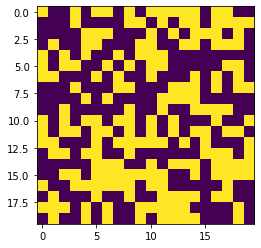

In [9]:
plt.imshow(s)

In [14]:
def make_lattice(N):
    """Returns a randomized NxN grid lattice which will evolve over time. 
    """
    #first, initialize the array
    N = 20
    s = np.empty((20,20),int)
    for i in range(N):
        for j in range(N):
            #initialize randomly as 1 or -1
            if np.random.random() <= 0.5:
                s[i,j] = 1
            else: 
                s[i,j] = -1
            
    return s

In [15]:
def metropolize(s,steps):
    """
    Returns a time evolved ising grid, after the designated number of steps. 
    """
    J = 1
    T = 1
    kb = 1
    beta = 1

    # now do me
    eplot = []
    Mplot = []
    E1 = energy(s)
    M = s.sum()
    for k in range(steps): # over total steps
        i = randint(N) #select a random point
        j = randint(N)
        s[i,j] *=-1 #propose an energy change,   by -1 will immediately flip it!

        E2 = energy(s) #compute new energy

        dE = E2 - E1 #see what the change in energy is 

        if dE>0:  #if the system's total energy was not greater, 

            if np.random.random()<np.exp(-beta*dE):  #accept the flip with probability according to boltzlmann dist. 
                E1 = E2 #flip is acepted
                M = s.sum()   #calculate new magnetization 
            else:  
                s[i,j]*=-1  #if it wasn't accepted, revert back like this. 

        else:
            E1 = E2 #flip is accepted because energy falls
            M = s.sum()
        eplot.append(E1)
        Mplot.append(M)
    print("Done!")
    
    
    return s, eplot,Mplot

Done!
Done!
Done!
Done!
Done!


/Users/noahkasmanoff/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/noahkasmanoff/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


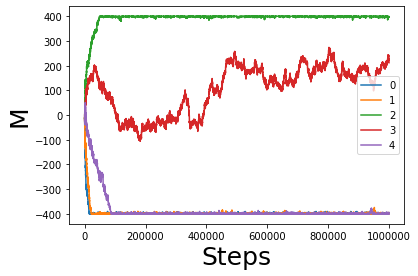

In [35]:
i = 0
while i < 5: 
    s = make_lattice(20)
    snew,eplot,Mplot = metropolize(s,int(1e6
                    ))
    plt.plot(Mplot,label = str(i))
    i +=1
    
plt.xlabel('Steps',fontsize=25)
plt.ylabel('M',fontsize=25)
plt.legend()

# Make a plot of the total magnetization M = ∑i si of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a “spontaneous mag- netization,” a nonzero value of the overall magnetization. 

# d) Runyourprogramseveraltimesandobservethesignofthemagnetizationthatdevelops, positive or negative. Describe what you find and give a brief explanation of what is happening.

For this, I'll plot in comparison multiple magnetization curves. Would be nice if all one line then. 

# e) Print out several plots of what's happening in the lattice at different stages in the ising model. 

Done!
Done!
Done!
Done!


Text(0, 0.5, '$y$')

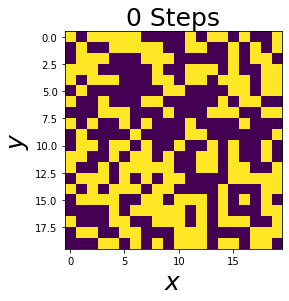

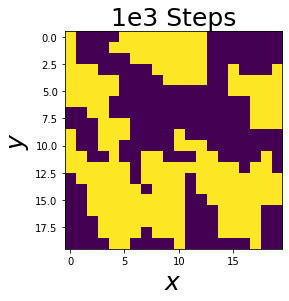

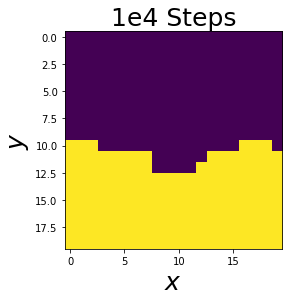

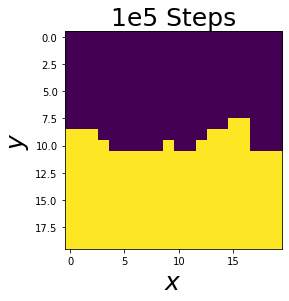

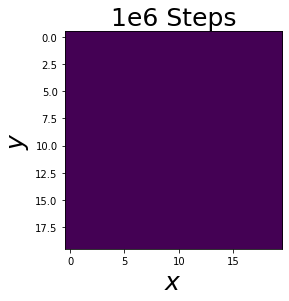

In [34]:
i = 0

s = make_lattice(20)
#start with original
plt.figure()
plt.title('0 Steps',fontsize=25)
plt.imshow(s)
plt.xlabel('$x$',fontsize=25)
plt.ylabel('$y$',fontsize = 25)

plt.figure()
snew,eplot,Mplot = metropolize(s,int(1e3))
plt.title('1e3 Steps',fontsize=25)
plt.imshow(snew)
plt.xlabel('$x$',fontsize=25)
plt.ylabel('$y$',fontsize = 25)


plt.figure()
snew,eplot,Mplot = metropolize(snew,int(1e4))
plt.title('1e4 Steps',fontsize=25)
plt.imshow(snew)
plt.xlabel('$x$',fontsize=25)
plt.ylabel('$y$',fontsize = 25)



plt.figure()
snew,eplot,Mplot = metropolize(snew,int(1e5))
plt.title('1e5 Steps',fontsize=25)
plt.imshow(snew)
plt.xlabel('$x$',fontsize=25)
plt.ylabel('$y$',fontsize = 25)


plt.figure()
snew,eplot,Mplot = metropolize(snew,int(1e6))
plt.title('1e6 Steps',fontsize=25)
plt.imshow(snew)
plt.xlabel('$x$',fontsize=25)
plt.ylabel('$y$',fontsize = 25)
